# Basic Exercises on Data Importing - Understanding - Manipulating - Analysis - Visualization

## Section-1: The pupose of the below exercises (1-7) is to create dictionary and convert into dataframes, how to diplay etc...
## The below exercises required to create data 

### 1. Import the necessary libraries (pandas, numpy, datetime, re etc)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

### 2. Run the below line of code to create a dictionary and this will be used for below exercises

In [ ]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

### 3. Assign it to a object called pokemon and it should be a pandas DataFrame

In [ ]:
pokemon = pd.DataFrame(raw_data)

### 4. If the DataFrame columns are in alphabetical order, change the order of the columns as name, type, hp, evolution, evolution

In [ ]:
pokemon = pokemon.iloc[:,[0,2,3,1,4]]

### 5. Add another column called place, and insert places (lakes, parks, hills, forest etc) of your choice.

In [ ]:
pokemon.loc[:,'place'] = ['lakes', 'parks', 'hills', 'forest']

### 6. Display the data type of each column

In [ ]:
pokemon.dtypes

### 7. Display the info of dataframe

In [ ]:
pokemon.info

## Section-2: The pupose of the below exercise (8-20) is to understand deleting data with pandas.
## The below exercises required to use wine.data

### 8. Import the dataset *wine.txt* from the folder and assign it to a object called wine

Please note that the original data text file doesn't contain any header. Please ensure that when you import the data, you should use a suitable argument so as to avoid data getting imported as header.

In [ ]:
wine = pd.read_csv('C:/Users/Nithin/Downloads/Basic Data Manipulation - Visualization Exercise 2/Exercise Data Files/wine.txt')

### 9. Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns

In [ ]:
wine.drop(wine.columns[[0,3,6,8,10,12]],axis = 1, inplace = True)

### 10. Assign the columns as below:

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it):  
1) alcohol  
2) malic_acid  
3) alcalinity_of_ash  
4) magnesium  
5) flavanoids  
6) proanthocyanins  
7) hue 

In [ ]:
wine[['alcohol','malic_acid','alcalinity_of_ash','magnesium','flavanoids','proanthocyanins','hue']] = ''

### 11. Set the values of the first 3 values from alcohol column as NaN

In [ ]:
wine.loc[0:2,'alcohol'] = np.nan

### 12. Now set the value of the rows 3 and 4 of magnesium as NaN

In [ ]:
wine.loc[[3,4],'magnesium'] = np.nan

### 13. Fill the value of NaN with the number 10 in alcohol and 100 in magnesium

In [ ]:
wine.alcohol.fillna(value = 10,inplace = True)
wine.magnesium.fillna(value = 100,inplace = True)

### 14. Count the number of missing values in all columns.

In [ ]:
wine.isna().sum()

### 15.  Create an array of 10 random numbers up until 10 and save it.

In [ ]:
random = np.random.randint(0,high = 11, size = 10)

### 16.  Set the rows corresponding to the random numbers to NaN in the column *alcohol*

In [ ]:
wine.loc[random,'alcohol'] = np.nan

### 17.  How many missing values do we have now?

In [ ]:
wine.isna().sum()

### 18. Print only the non-null values in alcohol

In [ ]:
wine[pd.notna(wine['alcohol'])]

### 19. Delete the rows that contain missing values

In [ ]:
wine.dropna(axis = 0,inplace = True, how = 'all',thresh = 5)

### 20.  Reset the index, so it starts with 0 again

In [ ]:
wine.reset_index(inplace = True)

## Section-3: The pupose of the below exercise (21-27) is to understand ***filtering & sorting*** data from dataframe.
## The below exercises required to use chipotle.tsv

This time we are going to pull data directly from the internet.  
Import the dataset directly from this link (https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv) and create dataframe called chipo

In [ ]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep = '\t')

### 21. How many products cost more than $10.00? 

Use `str` attribute to remove the $ sign and convert the column to proper numeric type data before filtering.


In [ ]:
chipo.item_price =chipo.item_price.str.replace('$','').astype('float')

### 22. Print the Chipo Dataframe & info about data frame

In [ ]:
print(chipo,chipo.dtypes,end = '\n')

### 23. What is the price of each item? 
- Delete the duplicates in item_name and quantity
- Print a data frame with only two columns `item_name` and `item_price`
- Sort the values from the most to less expensive

In [ ]:
chipo.drop_duplicates(subset = ['item_name','item_price'],inplace = True)
chipo.sort_values(['item_price'],ascending = False,inplace = True,ignore_index = True)
print(chipo.loc[:,['item_name','item_price']])

### 24. Sort by the name of the item

In [ ]:
chipo.sort_values('item_name',axis = 0,inplace = True)

### 25. What was the quantity of the most expensive item ordered?

In [ ]:
chipo.sort_values('item_price',ascending = False).head(1)

### 26. How many times were a Veggie Salad Bowl ordered?

In [ ]:
chipo.loc[chipo.item_name == 'Veggie Salad Bowl','order_id'].count()

### 27. How many times people orderd more than one Canned Soda?

In [ ]:
chipo.loc[(chipo.item_name == 'Canned Soda')& (chipo.quantity > 1),'order_id'].count()

## Section-4: The purpose of the below exercises is to understand how to perform aggregations of data frame
## The below exercises (28-33) required to use occupation.csv

###  28. Import the dataset occupation.csv and assign object as users

In [ ]:
users = pd.read_csv('C:/Users/Nithin/Downloads/Basic Data Manipulation - Visualization Exercise 2/Exercise Data Files/occupation.csv',sep = '|')

### 29. Discover what is the mean age per occupation

In [ ]:
round(users.groupby('occupation').age.mean(),1)

### 30. Discover the Male ratio per occupation and sort it from the most to the least.

Use numpy.where() to encode gender column.

In [ ]:
users['gencat']=np.where(users.gender == 'M',1,0)
round((users.groupby('occupation').gencat.sum())/(users.groupby('occupation').gender.count())*100,2)

### 31. For each occupation, calculate the minimum and maximum ages

In [ ]:
users.groupby('occupation').age.max()
users.groupby('occupation').age.min()

### 32. For each combination of occupation and gender, calculate the mean age

In [ ]:
round(users.groupby(['occupation','gender']).age.mean(),2)

### 33.  For each occupation present the percentage of women and men

In [ ]:
perM_F = round((users.groupby(['occupation','gender']).agg({'gender':'count'}))/(users.groupby('occupation').count())*100,2)
perM_F['gender']

## Section-6: The purpose of the below exercises is to understand how to use lambda-apply-functions
## The below exercises (34-41) required to use student-mat.csv and student-por.csv files 

### 34. Import the datasets *student-mat* and *student-por* and append them and assigned object as df

In [ ]:
stud_mat = pd.read_csv('C:/Users/Nithin/Downloads/Basic Data Manipulation - Visualization Exercise 2/Exercise Data Files/student-mat.csv')
stud_por = pd.read_csv('C:/Users/Nithin/Downloads/Basic Data Manipulation - Visualization Exercise 2/Exercise Data Files/student-por.csv')
df = stud_mat.append(stud_por)

### 35. For the purpose of this exercise slice the dataframe from 'school' until the 'guardian' column

In [ ]:
df.iloc[:,0:df.columns.get_loc('guardian')+1]

### 36. Create a lambda function that captalize strings (example: if we give at_home as input function and should give At_home as output.

In [ ]:
str_cap = lambda x: x.title()

### 37. Capitalize both Mjob and Fjob variables using above lamdba function

In [ ]:
df.Mjob = df.Mjob.apply(str_cap)
df.Fjob = df.Fjob.apply(str_cap)

### 38. Print the last elements of the data set. (Last few records)

In [ ]:
df.tail()

### 39. Did you notice the original dataframe is still lowercase? Why is that? Fix it and captalize Mjob and Fjob.

In [ ]:
df.age

### 40. Create a function called majority that return a boolean value to a new column called legal_drinker

In [ ]:
df['legal_drinker'] = np.where(df.age > 18,1,0)

### 41. Multiply every number of the dataset by 10. 

In [ ]:
df.select_dtypes('int64').apply(lambda x : x * 10)

## Section-6: The purpose of the below exercises is to understand how to perform simple joins
## The below exercises (42-48) required to use cars1.csv and cars2.csv files 

### 42. Import the datasets cars1.csv and cars2.csv and assign names as cars1 and cars2

In [ ]:
cars1 = pd.read_csv('C:/Users/Nithin/Downloads/Basic Data Manipulation - Visualization Exercise 2/Exercise Data Files/cars1.csv')
cars2 = pd.read_csv('C:/Users/Nithin/Downloads/Basic Data Manipulation - Visualization Exercise 2/Exercise Data Files/cars2.csv')

   ### 43. Print the information to cars1 by applying below functions 
   hint: Use different functions/methods like type(), head(), tail(), columns(), info(), dtypes(), index(), shape(), count(), size(), ndim(), axes(), describe(), memory_usage(), sort_values(), value_counts()
   Also create profile report using pandas_profiling.Profile_Report

In [ ]:
cars1.dtypes

In [ ]:
cars1.head(2)

In [ ]:
cars1.tail(2)

In [ ]:
cars1.columns

In [ ]:
cars1.info

In [ ]:
cars1.index

In [ ]:
cars1.shape

In [ ]:
cars1.ndim

In [ ]:
cars1.axes

In [ ]:
cars1.describe

In [ ]:
cars1.memory_usage

In [ ]:
cars1.sort_values('model')

In [ ]:
cars1.value_counts

In [ ]:
import pandas_profiling as pp
pp.ProfileReport(cars1)

### 44. It seems our first dataset has some unnamed blank columns, fix cars1

In [ ]:
cars1.drop(columns = ['Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13'],inplace = True)

### 45. What is the number of observations in each dataset?

In [ ]:
cars1.shape[0]
cars2.shape[0]

### 46. Join cars1 and cars2 into a single DataFrame called cars

In [ ]:
cars = cars1.append(cars2,ignore_index= True)

### 47. There is a column missing, called owners. Create a random number Series from 15,000 to 73,000.

In [ ]:
cars['owners'] = np.random.randint(15000,730001,size = cars.shape[0])

### 48. Add the column owners to cars

In [ ]:
cars

## Section-7: The purpose of the below exercises is to understand how to perform date time operations

### 49. Write a Python script to display the
- a. Current date and time
- b. Current year
- c. Month of year
- d. Week number of the year
- e. Weekday of the week
- f. Day of year
- g. Day of the month
- h. Day of week

In [ ]:
dt.datetime.today()

In [ ]:
dt.datetime.today().year

In [ ]:
dt.datetime.today().month

In [ ]:
dt.datetime.today().isocalendar()[1]

In [ ]:
dt.datetime.today().strftime('%A')

In [ ]:
dt.datetime.today().strftime('%j')

In [ ]:
dt.datetime.today().strftime('%d')

In [ ]:
dt.datetime.today().strftime('%w')

### 50. Write a Python program to convert a string to datetime.
Sample String : Jul 1 2014 2:43PM 

Expected Output : 2014-07-01 14:43:00

In [ ]:
s = 'Jul 1 2014 2:43PM'
s = dt.datetime.strptime(s,'%b %d %Y %I:%M%p')
s.strftime('%Y-%m-%d %H:%M:%S')

### 51. Write a Python program to subtract five days from current date.

Current Date : 2015-06-22

5 days before Current Date : 2015-06-17

In [ ]:
dt.datetime.now() - dt.timedelta(5)

### 52. Write a Python program to convert unix timestamp string to readable date.

Sample Unix timestamp string : 1284105682
    
Expected Output : 2010-09-10 13:31:22

In [ ]:
t = 1284105682
t = dt.datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M:%S')

### 53. Convert the below Series to pandas datetime : 

DoB = pd.Series(["07Sep59","01Jan55","15Dec47","11Jul42"])

Make sure that the year is 19XX not 20XX

In [ ]:
DoB = pd.Series(["07Sep59","01Jan55","15Dec47","11Jul42","12Jan79"])

In [ ]:
DOB = pd.Series(np.where(pd.to_datetime(DoB,format = '%d%b%y').dt.year > 2021 ,
         pd.to_datetime(DoB,format = '%d%b%y') + pd.DateOffset(years = -100),
         pd.to_datetime(DoB,format = '%d%b%y')))

### 54. Write a Python program to get days between two dates. 

In [ ]:
a = DOB[1]
b = DOB[3]
pd.Timedelta(a-b)

### 55. Convert the below date to datetime and then change its display format using the .dt module

Date = "15Dec1989"

Result : "Friday, 15 Dec 98"

In [ ]:
c = "15Dec1989"
dt.datetime.strptime(c,'%d%b%Y')

## The below exercises (56-66) required to use wind.data file 

### About wind.data:

The data have been modified to contain some missing values, identified by NaN.  

1. The data in 'wind.data' has the following format:

### 56. Import the dataset wind.data and assign it to a variable called data and replace the first 3 columns by a proper date time index

In [ ]:
data = pd.read_csv('C:/Users/Nithin/Downloads/Basic Data Manipulation - Visualization Exercise 2/Exercise Data Files/wind.data')

In [ ]:
data.Yr = pd.Series(np.where(pd.to_datetime(data.Yr, format = '%y').dt.year > 2022,
    pd.to_datetime(data.Yr, format = '%y') + pd.DateOffset(years = -100),
    pd.to_datetime(data.Yr, format = '%y')))
data.Yr = data.Yr.dt.year

In [ ]:
#Data Prep
data.Yr = data.Yr.astype('str')
data.Mo = data.Mo.astype('str')
data.Dy = data.Dy.astype('str')
data['DOI'] = Y+'-'+M+'-'+D
data.DOI = pd.to_datetime(data.DOI,format = '%Y-%m-%d')


### 57. Year 2061 is seemingly imporoper. Convert every year which are < 70 to 19XX instead of 20XX.

In [ ]:
data

### 58. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [ ]:
data.index = data.DOI

### 59. Compute how many values are missing for each location over the entire record.  
#### They should be ignored in all calculations below. 

In [ ]:
data.isna().sum()

### 60. Compute how many non-missing values there are in total.

In [ ]:
data.notnull().sum()

In [ ]:
data.dropna(axis = 0,inplace = True)

### 61. Calculate the mean windspeeds over all the locations and all the times.
#### A single number for the entire dataset.

In [ ]:
data.select_dtypes(['int64','float64']).mean(axis = 1)

### 62. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days 

#### A different set of numbers for each location.

In [ ]:
loc_stats = data.select_dtypes(['int64','float64']).describe()

### 63. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

#### A different set of numbers for each day.

In [ ]:
data.groupby(data.index).describe()

### 64. Find the average windspeed in January for each location.  
#### Treat January 1961 and January 1962 both as January.

In [ ]:
data.groupby('Mo').get_group('1').select_dtypes(['int64','float64']).mean(axis = 1)

### 65. Calculate the mean windspeed for each month in the dataset.  
#### Treat January 1961 and January 1962 as *different* months.
#### (hint: first find a  way to create an identifier unique for each month.)

In [ ]:
data.groupby('Mo').sum().mean(axis = 1)

### 66. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [ ]:
data.DOI.dt.week

In [ ]:
data.loc[data.Yr == '1961',:].groupby(data.DOI.dt.week).describe().head()

## The below exercises (67-70) required to use appl_1980_2014.csv  file

### 67. Import the file appl_1980_2014.csv and assign it to a variable called 'apple'

In [ ]:
apple = pd.read_csv('C:/Users/Nithin/Downloads/Basic Data Manipulation - Visualization Exercise 2/Exercise Data Files/appl_1980_2014.csv')

### 68.  Check out the type of the columns

In [ ]:
apple.dtypes

### 69. Transform the Date column as a datetime type

In [ ]:
apple.Date = pd.to_datetime(apple.Date,format = '%Y-%m-%d' )

### 70.  Set the date as the index

In [ ]:
apple.index = apple.Date

### 71.  Is there any duplicate dates?

In [ ]:
apple.duplicated(subset='Date').sum()

### 72.  The index is from the most recent date. Sort the data so that the first entry is the oldest date.

In [ ]:
apple.sort_index(level = 'Date',ascending = True,inplace = True)

### 73. Get the last business day of each month

In [ ]:
apple['Last_day'] = apple.Date.dt.daysinmonth

### 74.  What is the difference in days between the first day and the oldest

In [ ]:
apple.Date.max()-apple.Date.min()

### 75.  How many months in the data we have?

In [ ]:
(pd.Timestamp(apple.Date.max())-pd.Timestamp(apple.Date.min())).days/30.5

## Section-8: The purpose of the below exercises is to understand how to create basic graphs

### 76. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [ ]:
apple.rename(columns= {'Adj Close':'Adj_close'},inplace = True)

In [ ]:
apple.Adj_close.plot(kind = 'line')

## The below exercises (77-80) required to use Online_Retail.csv file

### 77. Import the dataset from this Online_Retail.csv and assign it to a variable called online_rt

In [3]:
online_rt = pd.read_csv('C:/Users/Nithin/Downloads/Basic Data Manipulation - Visualization Exercise 2/Exercise Data Files/Online_Retail.csv',sep = ",", encoding='latin')

### 78. Create a barchart with the 10 countries that have the most 'Quantity' ordered except UK

In [95]:
bar = online_rt.groupby('Country').Quantity.sum().sort_values(ascending = False).head(11)
bar.drop(labels='United Kingdom',inplace = True)

<AxesSubplot:xlabel='Country'>

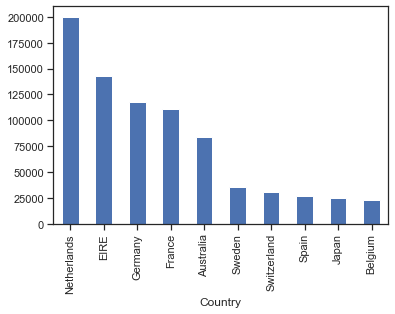

In [96]:
bar.plot(x = 'Country',kind ='bar')

### 79.  Exclude negative Quatity entries

In [113]:
online_rt = online_rt[online_rt.Quantity>=0]

### 80. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries
Hint: First we need to find top-3 countries based on revenue, then create scater plot between Quantity and Unitprice for each country separately


In [4]:
online_rt = online_rt.assign(Revenue = online_rt.UnitPrice * online_rt.Quantity)

In [5]:
line = online_rt.groupby('Country').Revenue.sum().sort_values(ascending = False).head(3)
a = list(line.index)

In [60]:
ln = online_rt.loc[online_rt.Country.isin(a),:]

<IPython.core.display.Javascript object>


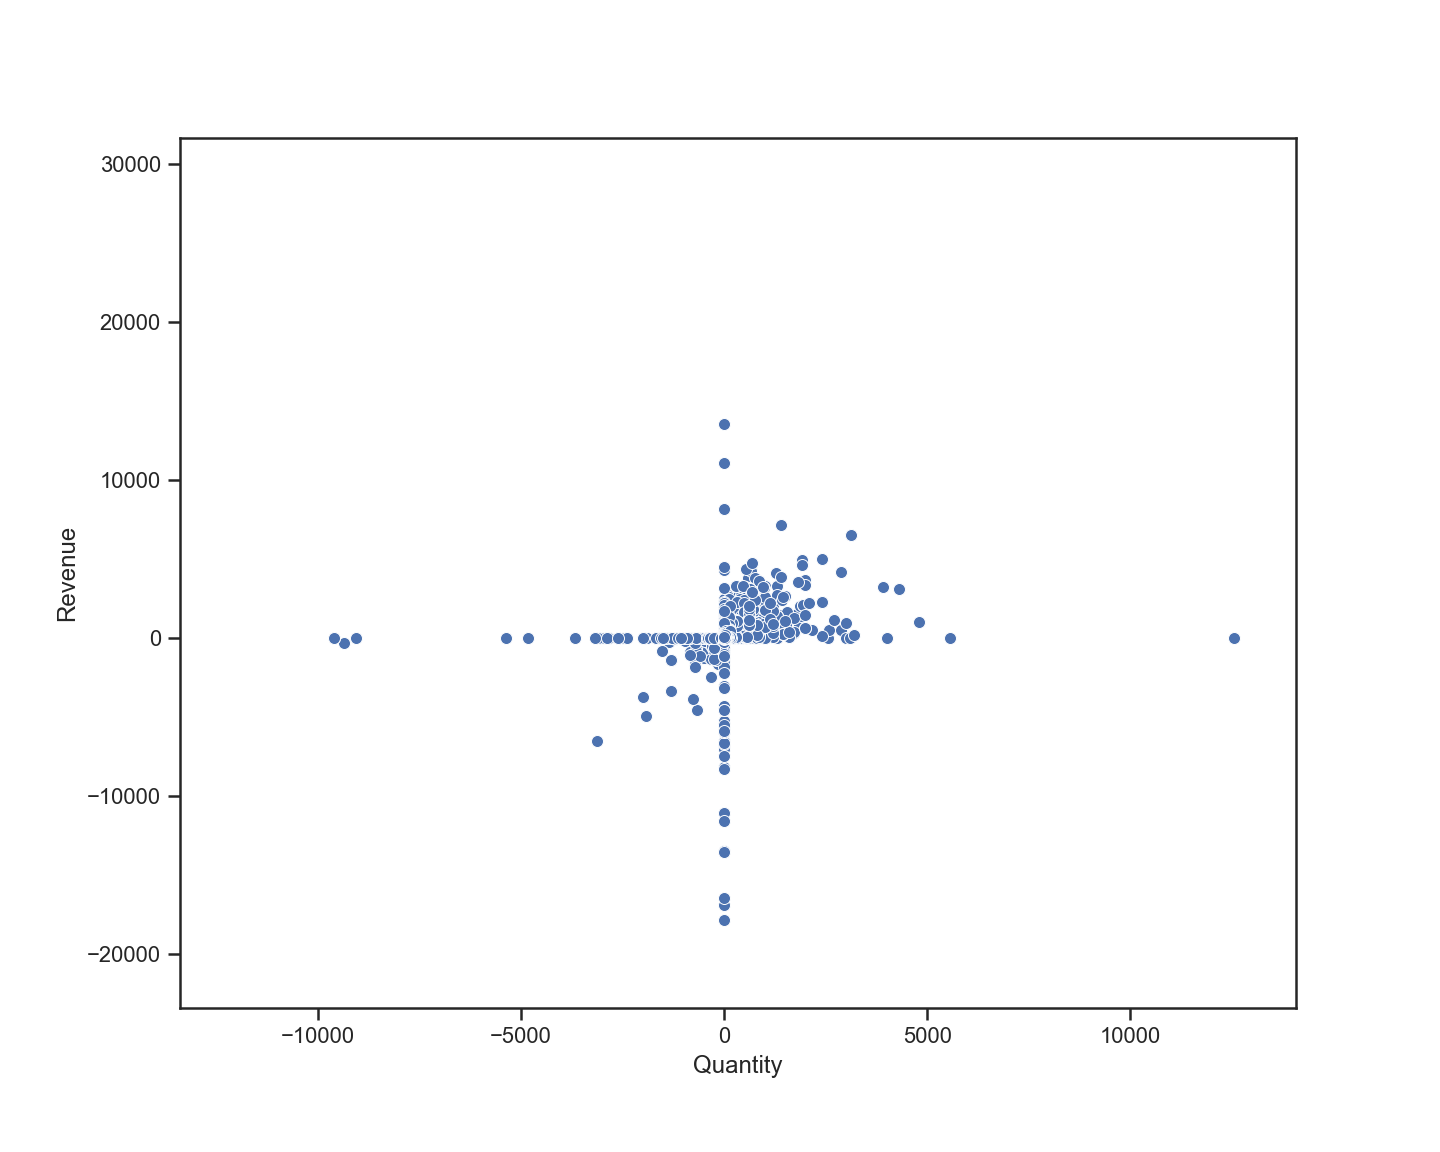

In [86]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = ln.Quantity, y = ln.Revenue)
plt.show()

## The below exercises (81-90) required to use FMCG_Company_Data_2019.csv file

### 81. Import the dataset FMCG_Company_Data_2019.csv and assign it to a variable called company_data

In [87]:
company_data = pd.read_csv('C:/Users/Nithin/Downloads/Basic Data Manipulation - Visualization Exercise 2/Exercise Data Files/FMCG_Company_Data_2019.csv')

### 82. Create line chart for Total Revenue of all months with following properties
- X label name = Month
- Y label name = Total Revenue

In [95]:
company_data.Month =pd.to_datetime(company_data.Month,format= '%b-%y')

<IPython.core.display.Javascript object>


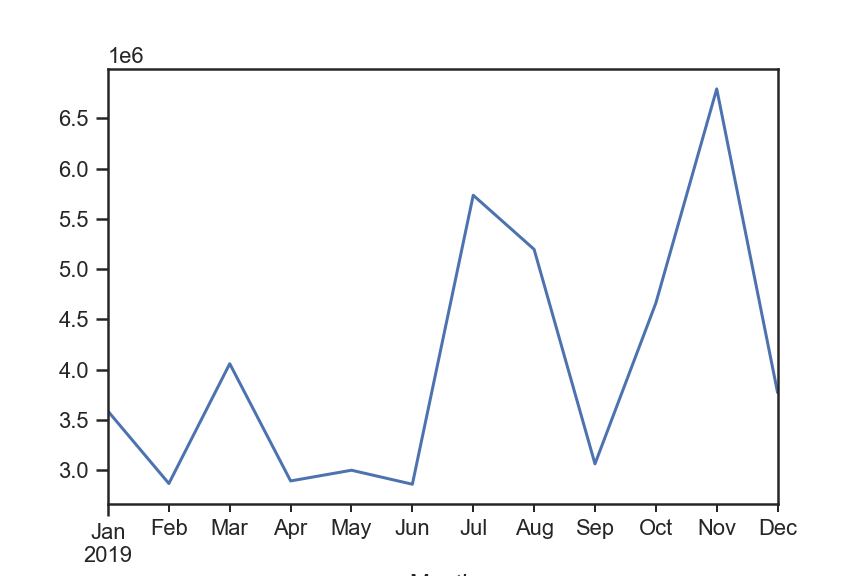

<AxesSubplot:xlabel='Month'>

In [107]:
company_data.groupby('Month').sum()['Total_Revenue'].plot(kind = 'line',legend = False)

### 83. Create line chart for Total Units of all months with following properties
- X label name = Month
- Y label name = Total Units
- Line Style dotted and Line-color should be red
- Show legend at the lower right location.

In [ ]:
plt.legend('Blue',loc = 'lower right')

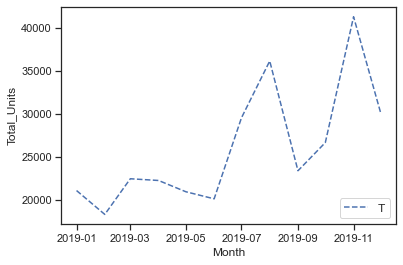

In [151]:
sns.lineplot(x = company_data.Month, y = company_data.Total_Units,linestyle = '--',legend= 'auto')
plt.legend(labels = 'Total',fontsize = 'large',loc = 'lower right',bbox_to_anchor = (1,0))

### 84. Read all product sales data (Facecream, FaceWash, Toothpaste, Soap, Shampo, Moisturizer) and show it  using a multiline plot
- Display the number of units sold per month for each product using multiline plots. (i.e., Separate Plotline for each product ).

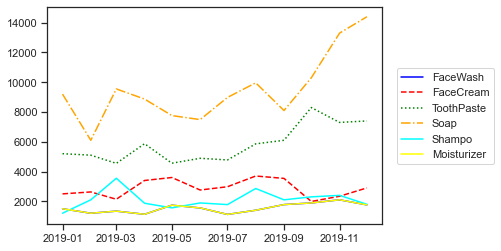

In [213]:
plt.plot(company_data.Month,company_data.FaceWash, label = 'FaceWash',linestyle = '-',color = 'blue')
plt.plot(company_data.Month,company_data.FaceCream, label = 'FaceCream',linestyle = '--',color = 'red')
plt.plot(company_data.Month,company_data.ToothPaste, label = 'ToothPaste',linestyle = ':',color = 'green')
plt.plot(company_data.Month,company_data.Soap, label = 'Soap',linestyle = '-.',color = 'orange')
plt.plot(company_data.Month,company_data.Shampo, label = 'Shampo',linestyle = '-',color = 'cyan')
plt.plot(company_data.Month,company_data.Moisturizer, label = 'Moisturizer',linestyle = '-',color = 'yellow')
plt.legend(loc = 'lower right',bbox_to_anchor = (1.35,0.25))

### 85. Create Bar Chart for soap of all months and Save the chart in folder

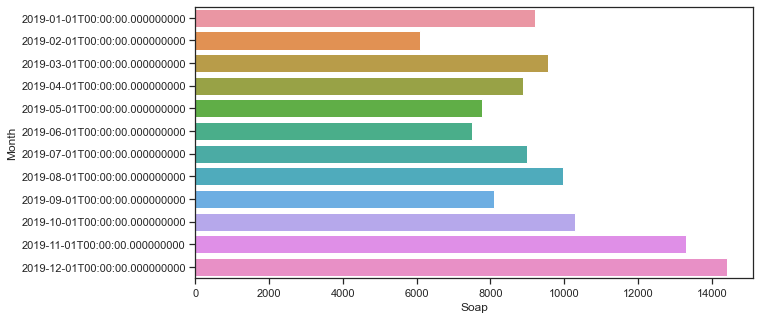

In [229]:
plt.figure(figsize=(10,5))
sns.barplot(y = company_data.Month,x = company_data.Soap)
plt.savefig('Z:/bar', bbox_inches='tight', dpi=150)
plt.show()

### 86. Create Stacked Bar Chart for Soap, Shampo, ToothPaste for each month
The bar chart should display the number of units sold per month for each product. Add a separate bar for each product in the same chart.

In [258]:
st = company_data.groupby('Month').sum()[['Soap','Shampo','ToothPaste']]

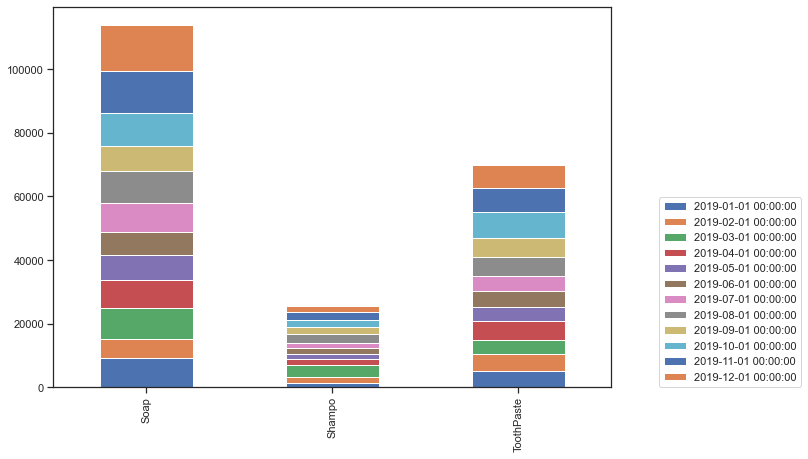

In [293]:
ax = st.set_index(st.index).T.plot.bar(stacked=True, figsize=(10, 7))
plt.legend(loc = 'right',bbox_to_anchor = (1.35,0.25))

### 87. Create Histogram for Total Revenue

<AxesSubplot:>

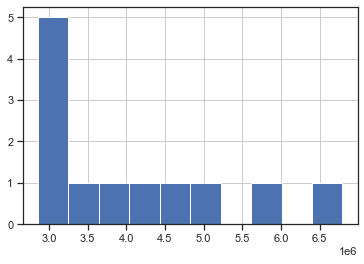

In [279]:
company_data.Total_Revenue.hist()

### 88. Calculate total sales data (quantity) for 2019 for each product and show it using a Pie chart. Understand percentage contribution from each product

In [390]:
l1 = []
l1.extend(company_data.groupby(company_data.Month.dt.year).sum().iloc[:,0:6].values)

In [403]:
name = company_data.groupby(company_data.Month.dt.year).sum().iloc[:,0:6].columns

In [393]:
l1 = l1[0]

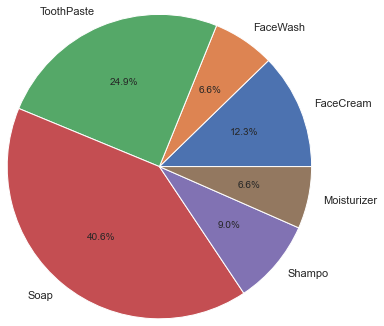

In [410]:
plt.pie(l1,labels=name,autopct='%1.1f%%',radius = 1.75)
plt.show()

### 89. Create line plots for Soap & Facewash of all months in a single plot using Subplot

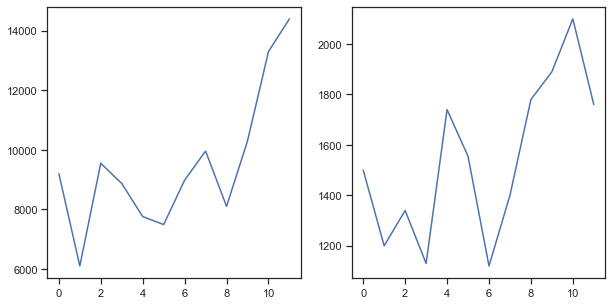

In [421]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].plot(company_data.Soap)
ax[1].plot(company_data.FaceWash)

### 90. Create Box Plot for Total Profit variable

<AxesSubplot:>

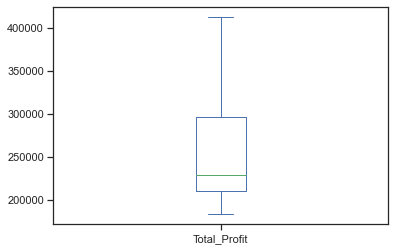

In [423]:
company_data.Total_Profit.plot(kind = 'box')